In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

from dataloaders import *
from util import Config
from viz_utils import *

In [5]:
datasets = ["MRPC", "TREC-2", "SUBJ", "AGN-2", "TREC-6", "AGN-4", "SST"]
dataset_map = {
    "TREC-2": "TREC-2",
    "SUBJ": "SUBJ",
    "AGN-2": "AGN-2",
    "TREC-6": "TREC-full",
    "SST": "SST",
    "COLA": "COLA",
    "AGN-4": "ag_news-full",
}
models = ["BERT", "ELECTRA"]
load_anti = False
n = 0  # AL step at which evaluation (AUC) starts
model = "BERT"
mode = "ada"
dataset = "TREC-6"

aucs = []
trs = []
try:
    experiments, meta = load_results(
        base_dir=f"results/",
        dataset=dataset,
        model=model,
    )
except:
    print(f"No experiments for {dataset}-{model}-{mode}")
for load_mode in ["last", "best"]:
    if mode == "short" and load_mode == "best":
        continue
    mode_print = mode if load_mode == "last" else f"{mode}-besov"
    print(f"Loading {dataset} -- {mode_print} -- {model}")
    df_tr_i = results_to_df(experiments, mode=load_mode)

    df_tr_i["model"] = model
    df_tr_i["mode"] = mode_print
    df_tr_i["dataset"] = dataset
    df_tr_i = df_tr_i.reset_index().set_index(
        ["dataset", "model", "mode", "sampler", "experiment", "al_iter"]
    )
    trs.append(df_tr_i)

    df_auc_i = al_auc(df_tr_i)
    df_auc_i["mode"] = mode_print
    df_auc_i = df_auc_i.reset_index().set_index(["mode", "sampler"])
    aucs.append(df_auc_i)


# plot_besov_index(df_tr, ci=0)
# plot_al_accuracy(df_tr, metric="f1_micro", ci=0)
df_tr = pd.concat(trs)
df_auc = pd.concat(aucs)

TREC-6-BERT
Loading TREC-6 -- ada -- BERT
Loading TREC-6 -- ada-besov -- BERT


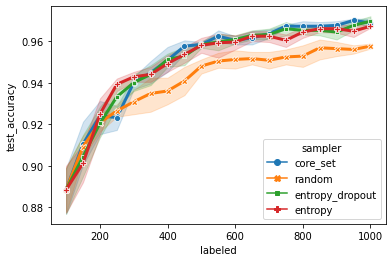

In [8]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "ada-besov"],
    x="labeled",
    y="test_accuracy",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=90,
    linewidth=3,
)
# plt.legend(loc='lower right')
# g.set_ylim(0.89, 0.98)
# g.set_xlim(200, 1000)

In [3]:
df_tr

labeled  train_loss  \
dataset model mode      sampler experiment al_iter                        
TREC-2  BERT  ada-besov random  0          0            100    0.657703   
                                           1            150    0.662511   
                                           2            200    0.651112   
                                           3            250    0.633320   
                                           4            300    0.642351   
...                                                     ...         ...   
                        entropy 4          14           800    0.658221   
                                           15           850    0.649009   
                                           16           900    0.659438   
                                           17           950    0.656500   
                                           18          1000    0.648496   

                                                    test_accuracy  f1_micro  \
dataset model mode      sampler experiment al_iter                            
TREC-2  BERT  ada-besov random  0          0             0.674897  0.674897   
                                           1             0.709877  0.709877   
                                           2             0.695473  0.695473   
                                           3             0.738683  0.738683   
                                           4             0.732510  0.732510   
...                                                           ...       ...   
                        entropy 4          14            0.775720  0.775720   
                                           15            0.806584  0.806584   
                                           16            0.800412  0.800412   
                                           17            0.818930  0.818930   
                                           18            0.816872  0.816872   

                                                    f1_macro  \
dataset model mode      sampler experiment al_iter             
TREC-2  BERT  ada-besov random  0          0        0.673964   
                                           1        0.701160   
                                           2        0.691073   
                                           3        0.738194   
                                           4        0.732143   
...                                                      ...   
                        entropy 4          14       0.771635   
                                           15       0.806466   
                                           16       0.799964   
                                           17       0.818820   
                                           18       0.816853   

                                                                                             selected  
dataset model mode      sampler experiment al_iter                                                     
TREC-2  BERT  ada-besov random  0          0        [1549, 1546, 1179, 111, 561, 1832, 619, 56, 51...  
                                           1        [364, 841, 941, 922, 152, 1904, 903, 450, 447,...  
                                           2        [142, 543, 930, 872, 865, 1646, 95, 589, 513, ...  
                                           3        [1630, 1187, 1237, 1552, 682, 1424, 357, 178, ...  
                                           4        [499, 1225, 1423, 438, 1077, 1637, 566, 1410, ...  
...                                                                                               ...  
                        entropy 4          14       [1416, 1090, 83, 524, 1923, 1278, 1293, 882, 1...  
                                           15       [1763, 240, 1153, 246, 1013, 1552, 1818, 1850,...  
                                           16       [168, 1248, 1598, 714, 784, 1841, 1253, 1873, ...  
                                           17       [1455, 1577, 1788, 

In [5]:
df_tr.groupby(["dataset", "model", "model", "sampler", "experiment"]).agg(list)

labeled  \
dataset model model sampler         experiment                                                      
TREC-2  BERT  BERT  core_set        0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    dal             0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    entropy         0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    entropy_dropout 0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    random          0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   

                                                                                       train_loss  \
dataset model model sampler         experiment                                                      
TREC-2  BERT  BERT  core_set        0           [0.6577029973268509, 0.6469762802124024, 0.636...   
                                    1           [0.6459900438785553, 0.6821997761726379, 0.616...   
                                    2           [0.6794537752866745, 0.6754907011985779, 0.601...   
                                    3           [0.6245803534984589, 0.6158845901489258, 0.592...   
                                    4           [0.650259718298912, 0.6353173375129699, 0.6251...   
                    dal             0           [0.6577029973268509, 0.6642346858978272, 0.663...   
                                    1           [0.6459900438785553, 0.6488877415657044, 0.636...   
                                    2           [0.6794537752866745, 0.651800012588501, 0.6412...   
                                    3           [0.6245803534984589, 0.6310327291488648, 0.683...   
                                    4           [0.650259718298912, 0.6481092929840088, 0.6514...   
                    entropy         0           [0.6577029973268509, 0.6654908657073975, 0.656...   
                                    1           [

In [ ]:
df_tr.groupby(["dataset", "model", "model", "sampler", "experiment"]).agg(list)
    

In [10]:
import os
import torch

import numpy as np
from podium import Vocab, Field, LabelField, Iterator  # , BucketIterator
from podium.datasets import TabularDataset
from podium.datasets.hf import HFDatasetConverter
from podium.vectorizers import GloVe
from podium.utils.general_utils import repr_type_and_attrs

from typing import Iterator as PythonIterator
from typing import NamedTuple, Tuple


from transformers import AutoTokenizer

from util import Config


class BucketIterator(Iterator):
    """
    Creates a bucket iterator which uses a look-ahead heuristic to batch
    examples in a way that minimizes the amount of necessary padding.

    Uses a bucket of size N x batch_size, and sorts instances within the bucket
    before splitting into batches, minimizing necessary padding.
    """

    def __init__(
        self,
        dataset=None,
        batch_size=32,
        sort_key=None,
        shuffle=True,
        seed=1,
        matrix_class=np.array,
        internal_random_state=None,
        look_ahead_multiplier=100,
        bucket_sort_key=None,
    ):
        """
        Creates a BucketIterator with the given bucket sort key and look-ahead
        multiplier (how many batch_sizes to look ahead when sorting examples for
        batches).

        Parameters
        ----------
        look_ahead_multiplier : int
            Multiplier of ``batch_size`` which determines the size of the
            look-ahead bucket.
            If ``look_ahead_multiplier == 1``, then the BucketIterator behaves
            like a normal Iterator.
            If ``look_ahead_multiplier >= (num_examples / batch_size)``, then
            the BucketIterator behaves like a normal iterator that sorts the
            whole dataset.
            Default is ``100``.
            The callable object used to sort examples in the bucket.
            If ``bucket_sort_key=None``, then the ``sort_key`` must not be ``None``,
            otherwise a ``ValueError`` is raised.
            Default is ``None``.

        Raises
        ------
        ValueError
            If sort_key and bucket_sort_key are both None.
        """

        if sort_key is None and bucket_sort_key is None:
            raise ValueError(
                "For BucketIterator to work, either sort_key or "
                "bucket_sort_key must be != None."
            )

        super().__init__(
            dataset,
            batch_size,
            sort_key=sort_key,
            shuffle=shuffle,
            seed=seed,
            matrix_class=matrix_class,
            internal_random_state=internal_random_state,
        )

        self.bucket_sort_key = bucket_sort_key
        self.look_ahead_multiplier = look_ahead_multiplier

    def __iter__(self) -> PythonIterator[Tuple[NamedTuple, NamedTuple]]:
        step = self.batch_size * self.look_ahead_multiplier
        dataset = self._dataset

        # Fix: Shuffle dataset if the shuffle is turned on, only IF sort key is not none
        if self._shuffle and self._sort_key is None:
            indices = list(range(len(dataset)))
            # Cache state prior to shuffle so we can use it when unpickling
            self._shuffler_state = self.get_internal_random_state()
            self._shuffler.shuffle(indices)
            # dataset.shuffle_examples(random_state=self._shuffler_state)
            dataset = dataset[indices]

        # Determine the step where iteration was stopped for lookahead & within bucket
        lookahead_start = (
            self.iterations // self.look_ahead_multiplier * self.look_ahead_multiplier
        )
        batch_start = self.iterations % self.look_ahead_multiplier

        if self._sort_key is not None:
            dataset = dataset.sorted(key=self._sort_key)
        for i in range(lookahead_start, len(dataset), step):
            bucket = dataset[i : i + step]

            if self.bucket_sort_key is not None:
                bucket = bucket.sorted(key=self.bucket_sort_key)

            for j in range(batch_start, len(bucket), self.batch_size):
                batch_dataset = bucket[j : j + self.batch_size]
                batch = self._create_batch(batch_dataset)

                yield batch
                self._iterations += 1

        # prepare for new epoch
        self._iterations = 0
        self._epoch += 1

    def __repr__(self) -> str:
        attrs = {
            "batch_size": self._batch_size,
            "epoch": self._epoch,
            "iteration": self._iterations,
            "shuffle": self._shuffle,
            "look_ahead_multiplier": self.look_ahead_multiplier,
        }
        return repr_type_and_attrs(self, attrs, with_newlines=True)


class TokenizerVocabWrapper:
    def __init__(self, tokenizer):
        # wrap BertTokenizer so the method signatures align with podium
        self.tokenizer = tokenizer

    def get_padding_index(self):
        return self.tokenizer.convert_tokens_to_ids(self.tokenizer.pad_token)

    def __len__(self):
        return len(self.tokenizer)

    def numericalize(self, instance):
        # Equivalent to .encode, but I want to delineate the steps
        return self.tokenizer.convert_tokens_to_ids(self.tokenizer.tokenize(instance))


def load_embeddings(vocab, name="glove"):
    if name == "glove":
        glove = GloVe()
        embeddings = glove.load_vocab(vocab)
        return embeddings
    else:
        raise ValueError(f"Wrong embedding key provided {name}")


def make_iterable(dataset, device, batch_size=32, train=False, indices=None):
    """
    Construct a DataLoader from a podium Dataset
    """

    def instance_length(instance):
        raw, tokenized = instance.text
        return -len(tokenized)

    def cast_to_device(data):
        return torch.tensor(np.array(data), device=device)

    # Selects examples at given indices to support subset iteration.
    if indices is not None:
        dataset = dataset[indices]

    # iterator = BucketIterator(
    #     dataset,
    #     batch_size=batch_size,
    #     sort_key=instance_length,
    #     shuffle=train,
    #     matrix_class=cast_to_device,
    #     look_ahead_multiplier=20,
    # )

    iterator = Iterator(
        dataset,
        batch_size=batch_size,
        shuffle=train,
        matrix_class=cast_to_device,
    )

    return iterator


class Instance:
    def __init__(self, index, text, label, extras=None):
        self.index = index
        self.text = text
        self.label = label
        self.extras = extras
        self.length = len(text)  # text is already tokenized & filtered

    def set_mask(self, masked_text, masked_labels):
        # Set the masking as an attribute
        self.masked_text = masked_text
        self.masked_labels = masked_labels

    def set_numericalized(self, indices, target):
        self.numericalized_text = indices
        self.numericalized_label = target
        self.length = len(indices)

    def __repr__(self):
        return f"{self.index}: {self.length}, {self.label}"


def generate_eraser_rationale_mask(tokens, evidences):
    mask = torch.zeros(len(tokens))  # zeros for where you can attend to

    any_evidence_left = False
    for ev in evidences:
        if ev.start_token > len(tokens) or ev.end_token > len(tokens):
            continue  # evidence out of span

        if not any_evidence_left:
            any_evidence_left = True
        # 1. Validate

        assert ev.text == " ".join(
            tokens[ev.start_token : ev.end_token]
        ), "Texts dont match; did you filter some tokens?"

        mask[ev.start_token : ev.end_token] = 1
    return mask


def load_tse(
    train_path="data/TSE/train.csv", test_path="data/TSE/test.csv", max_size=20000
):

    vocab = Vocab(max_size=max_size)
    fields = [
        Field("id", numericalizer=None),
        Field("text", numericalizer=vocab, include_lengths=True),
        Field("rationale", numericalizer=vocab),
        LabelField("label"),
    ]
    train_dataset = TabularDataset(
        train_path, format="csv", fields=fields, skip_header=True
    )
    test_dataset = TabularDataset(
        test_path, format="csv", fields=fields, skip_header=True
    )
    train_dataset.finalize_fields()
    return (train_dataset, test_dataset), vocab


class MaxLenHook:
    def __init__(self, max_len):
        self.max_len = max_len

    def __call__(self, raw, tokenized):
        return raw, tokenized[: self.max_len]


def lowercase_hook(raw, tokenized):
    return raw, [tok.lower() for tok in tokenized]


def isalnum(token):
    return any(c.isalnum() for c in token)


def remove_nonalnum(raw, tokenized):
    # Remove non alphanumeric tokens
    return raw, [tok for tok in tokenized if isalnum(tok)]


def load_imdb(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/IMDB",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_isear(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/ISEAR",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_agn2(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/AGN-2",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_agn4(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/AGN-4",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_mnli(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):
    return load_sequence_pair_dataset(
        "data/GLUE/MNLI",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_mrpc(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):
    return load_sequence_pair_dataset(
        "data/GLUE/MRPC",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_qqp(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):
    return load_sequence_pair_dataset(
        "data/GLUE/QQP",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def test_load_cola(meta, tok):
    splits, vocab = load_cola(meta, tok)
    print(vocab)
    train, valid, test = splits
    print(len(train), len(valid), len(test))

    print(train)
    print(train[0])

    device = torch.device("cpu")
    train_iter = make_iterable(test, device, batch_size=2)
    batch = next(iter(train_iter))

    print(batch)
    text, length = batch.text
    print(length[0])
    print(vocab.get_padding_index())


def load_sequence_pair_dataset(
    data_dir, meta, tokenizer=None, max_vocab_size=20_000, max_seq_len=200
):

    # Use BERT subword tokenization
    vocab = TokenizerVocabWrapper(tokenizer)
    print(vocab.get_padding_index())
    pad_index = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
    fields = [
        Field("id", disable_batch_matrix=True),
        Field(
            "sequence1",
            tokenizer=tokenizer.tokenize,
            padding_token=pad_index,
            numericalizer=tokenizer.convert_tokens_to_ids,
            include_lengths=True,
            posttokenize_hooks=[
                remove_nonalnum,
                MaxLenHook(max_seq_len),
                lowercase_hook,
            ],
        ),
        Field(
            "sequence2",
            tokenizer=tokenizer.tokenize,
            padding_token=pad_index,
            numericalizer=tokenizer.convert_tokens_to_ids,
            include_lengths=True,
            posttokenize_hooks=[
                remove_nonalnum,
                MaxLenHook(max_seq_len),
                lowercase_hook,
            ],
        ),
        LabelField("label"),
    ]

    train = TabularDataset(
        os.path.join(data_dir, "train.csv"), format="csv", fields=fields
    )
    val = TabularDataset(
        os.path.join(data_dir, "validation.csv"), format="csv", fields=fields
    )
    test = TabularDataset(
        os.path.join(data_dir, "test.csv"), format="csv", fields=fields
    )

    train.finalize_fields()

    meta.vocab = vocab
    meta.num_tokens = len(vocab)
    meta.padding_idx = vocab.get_padding_index()
    meta.num_labels = len(train.field("label").vocab)

    return (train, val, test), vocab


def load_dataset(
    data_dir, meta, tokenizer=None, max_vocab_size=20_000, max_seq_len=200
):

    # Use BERT subword tokenization
    vocab = TokenizerVocabWrapper(tokenizer)
    pad_index = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
    fields = [
        Field("id", disable_batch_matrix=True),
        Field(
            "text",
            tokenizer=tokenizer.tokenize,
            padding_token=pad_index,
            numericalizer=tokenizer.convert_tokens_to_ids,
            include_lengths=True,
            posttokenize_hooks=[
                remove_nonalnum,
                MaxLenHook(max_seq_len),
                lowercase_hook,
            ],
        ),
#         LabelField("label"),
    ]

    train = TabularDataset(
        os.path.join(data_dir, "train.csv"), format="csv", fields=fields
    )
    val = TabularDataset(
        os.path.join(data_dir, "validation.csv"), format="csv", fields=fields
    )
    test = TabularDataset(
        os.path.join(data_dir, "test.csv"), format="csv", fields=fields
    )

    train.finalize_fields()

    meta.vocab = vocab
    meta.num_tokens = len(vocab)
    meta.padding_idx = vocab.get_padding_index()
    meta.num_labels = len(train.field("label").vocab)

    return (train, val, test), vocab


def load_sst(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):
    return load_dataset(
        "data/GLUE/SST-2",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def test_load_sst(max_vocab_size=20_000, max_seq_len=200):
    splits, vocab = load_sst()
    print(vocab)
    train, valid, test = splits
    print(len(train), len(valid), len(test))

    print(train)
    print(train[0])

    device = torch.device("cpu")
    train_iter = make_iterable(train, device, batch_size=2)
    batch = next(iter(train_iter))

    print(batch)
    text, length = batch.text
    print(vocab.reverse_numericalize(text[0]))
    print(length[0])
    print(vocab.get_padding_index())


def load_trec2(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/TREC-2",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_trec6(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/TREC-6",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_cola(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/GLUE/COLA",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_polarity(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/POL",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_subj(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/SUBJ",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_trec_hf(label="label-coarse", max_vocab_size=20_000, max_seq_len=200):
    vocab = Vocab(max_size=max_vocab_size)
    fields = [
        Field(
            "text",
            numericalizer=vocab,
            include_lengths=True,
            posttokenize_hooks=[MaxLenHook(max_seq_len)],
            keep_raw=True,
        ),
        LabelField("label"),
    ]
    hf_dataset = load_dataset("trec")
    hf_dataset = hf_dataset.rename_column(label, "label")
    print(hf_dataset)
    hf_train_val, hf_test = (
        hf_dataset["train"],
        hf_dataset["test"],
    )
    train_val_conv = HFDatasetConverter(hf_train_val, fields=fields)
    test_conv = HFDatasetConverter(hf_test, fields=fields)
    train_val, test = (
        train_val_conv.as_dataset(),
        test_conv.as_dataset(),
    )
    train, val = train_val.split(split_ratio=0.8, random_state=0)
    train.finalize_fields()
    print(train)
    return (train, val, test), vocab


def add_ids_to_files(root_folder):
    split_ins = ["train_old.csv", "dev_old.csv", "test_old.csv"]
    split_outs = ["train.csv", "dev.csv", "test.csv"]

    for split_in, split_out in zip(split_ins, split_outs):
        with open(os.path.join(root_folder, split_in), "r") as infile:
            with open(os.path.join(root_folder, split_out), "w") as outfile:
                for idx, line in enumerate(infile):
                    parts = line.strip().split(",")
                    if idx == 0:
                        continue
                    outfile.write(f"{idx-1},{parts[0]},{parts[1]}\n")


In [16]:
from models import *
from args import *

args = Config()
args.lr = 2e-5
args.l2 = 0
args.model = "BERT"
args.data = "TREC-6"
args.adapter = "unipelt"
args.batch_size = 32
args.epochs = 10
args.clip = 1

meta = Config()

dataloader = dataset_loaders[args.data]
tokenizer = AutoTokenizer.from_pretrained(TRANSFORMERS[args.model])
(train, val, test), vocab = dataloader(meta=meta, tokenizer=tokenizer)

if args.data in pair_sequence_datasets:
    meta.pair_sequence = True
else:
    meta.pair_sequence = False

if meta.num_labels == 2:
    # Binary classification
    criterion = nn.BCEWithLogitsLoss()
    meta.num_targets = 1
else:
    # Multiclass classification
    criterion = nn.CrossEntropyLoss()
    meta.num_targets = meta.num_labels
    
model = Transformer(args, meta, args.model, adapter=args.adapter)
optimizer = torch.optim.AdamW(model.parameters(), lr=args.lr, weight_decay=args.l2)
device = torch.device("cuda:0")




def make_iterable(dataset, device, batch_size=32, train=False, indices=None):
    """
    Construct a DataLoader from a podium Dataset
    """

    def instance_length(instance):
        raw, tokenized = instance.text
        return -len(tokenized)

    def cast_to_device(data):
        return torch.tensor(np.array(data), device=device)

    # Selects examples at given indices to support subset iteration.
    if indices is not None:
        dataset = dataset[indices]

    iterator = BucketIterator(
        dataset,
        batch_size=batch_size,
        sort_key=instance_length,
        shuffle=train,
        matrix_class=cast_to_device,
        look_ahead_multiplier=20,
    )

    return iterator


model.to(device)
train_iter = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
    train=True,
#     indices=indices,
)

In [19]:
import time
from al.experiment import Experiment


def train_model(model, optimizer, criterion, train_iter):
    model.train()

    total_loss = 0.0
    accuracy, confusion_matrix = 0, np.zeros(
        (meta.num_labels, meta.num_labels), dtype=int
    )

    logit_list = []
    y_true_list = []
    ids = []
    for batch_num, batch in enumerate(train_iter, 1):
        t = time.time()

        optimizer.zero_grad()

        ids.extend([int(id[0]) for id in batch.id])

        # Unpack batch & cast to device
        if meta.pair_sequence:
            (x_sequence1, sequence1_lengths) = batch.sequence1
            (x_sequence2, sequence2_lengths) = batch.sequence2
        else:
            (x, lengths) = batch.text

        y = batch.label
        y_true_list.append(y.squeeze(0) if y.numel() == 1 else y.squeeze())

        if meta.pair_sequence:
            # PSQ
            lengths = (sequence1_lengths, sequence2_lengths)
            logits, return_dict = model(x_sequence1, x_sequence2, lengths)
        else:
            # SSQ
            logits, return_dict = model(x, lengths)
        logit_list.append(logits)

        # Bookkeeping and cast label to float
        accuracy, confusion_matrix = Experiment.update_stats(
            accuracy, confusion_matrix, logits, y
        )
        if logits.shape[-1] == 1:
            # binary cross entropy, cast labels to float
            y = y.type(torch.float)

        loss = criterion(logits.view(-1, meta.num_targets).squeeze(), y.squeeze())

        total_loss += float(loss)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        optimizer.step()

        print(
            "[Batch]: {}/{} in {:.5f} seconds".format(
                batch_num, len(train_iter), time.time() - t
            ),
            end="\r",
            flush=True,
        )

    loss = total_loss / len(train_iter)
    result_dict = {"loss": loss}
    logit_tensor = torch.cat(logit_list)
    y_true = torch.cat(y_true_list)
    return result_dict, logit_tensor, y_true, ids

In [20]:
train_results = []
for epoch in range(1, args.epochs + 1):
    print(f"Training epoch: {epoch}/{args.epochs}")
    # a) Train for one epoch
    result_dict_train, logits, y_true, ids = train_model(
        model, optimizer, criterion, train_iter
    )
    print(result_dict_train)
    train_results.append(result_dict_train)

    # b) Evaluate model (test set)
#     eval_result_dict = self._evaluate_model(model)
#     acc.append(eval_result_dict["accuracy"])
#     loss.append(result_dict_train["loss"])
#     eval_results.append(eval_result_dict)

Training epoch: 1/10
{'loss': 1.5692268680123722}seconds
Training epoch: 2/10
{'loss': 1.233461660107756} seconds
Training epoch: 3/10
{'loss': 0.8343249787302578}seconds
Training epoch: 4/10
{'loss': 0.5697764279016482}seconds
Training epoch: 5/10
{'loss': 0.4263514495558209}seconds
Training epoch: 6/10
{'loss': 0.349474528207888} seconds
Training epoch: 7/10
{'loss': 0.30121782519458945}econds
Training epoch: 8/10
{'loss': 0.25657056335335465}econds
Training epoch: 9/10
{'loss': 0.22974231799005293}econds
Training epoch: 10/10
{'loss': 0.2082190094820035}seconds


In [58]:
model.eval()
name = model.get_classifier_name()
clf = model.classifier #getattr(model.classifier, name)
config = model.classifier.config
num_layers = config.num_hidden_layers

print(num_layers)

12


In [57]:
model.classifier(inputs)

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.3900,  4.1626, -0.7429, -1.9608, -1.0143, -2.7310],
        [ 5.2413, -1.1506,  1.8984, -2.0992, -2.6798, -1.6891],
        [ 1.3242,  0.6738, -1.9786,  4.5847, -2.2803, -2.1135],
        [ 4.9922, -0.5433,  0.5287, -1.2219, -2.0188, -2.5741],
        [ 4.2137, -2.3493,  2.1044, -1.1609, -1.4063, -1.8276],
        [-1.3099, -1.3617, -0.6319,  5.9067, -0.7854, -1.7350],
        [ 4.2988, -0.2366,  1.2845, -2.0587, -1.3539, -2.1875],
        [ 2.4077,  0.5523,  1.4256, -1.0230, -1.4068, -2.6421],
        [ 4.7827, -0.8779,  1.7367, -1.8129, -2.4295, -2.4101],
        [-0.0487,  0.8461, -0.9498,  0.4986,  1.3494, -2.3525],
        [ 3.9158,  1.9345, -0.3427, -2.2640, -1.8074, -2.4878],
        [ 3.3428, -1.2677,  2.7778, -1.1901, -1.8196, -2.5822],
        [ 0.2694,  6.6043, -1.8484, -2.0286, -1.0732, -2.7626],
        [ 1.1058,  3.6770, -1.5612, -0.3926, -0.4904, -2.9746],
        [ 1.4879,  0.1173,  0.7719, -1.5803,  0.6612, -1.8502

In [25]:
df = df_tr[
    (df_tr.index.get_level_values("sampler") == "entropy")
    & (df_tr.index.get_level_values("mode") == "ada-besov")
    & (df_tr.index.get_level_values("experiment") == 0)
]

In [27]:
selected = df.selected.agg(list)

In [40]:
sel = [s for ss in selected for s in ss]

In [42]:
indices = np.array(sel)

In [64]:
enc = []
grads = []
labels = []
enc_layers = {i: [] for i in range(num_layers)}


train_iter = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
    train=False,
    indices=indices,
)


with torch.inference_mode():
    for batch in train_iter:

        print(batch)
        inputs, _ = batch.text
        labels.append(batch.label)
        inputs.requires_grad = False

    #     embedded_tokens = clf.bert.embeddings(inputs)
    #     embedded_tokens = torch.autograd.Variable(
    #         embedded_tokens, requires_grad=True
    #     )
        encoded_all = clf(
            inputs,
            output_hidden_states=True,
            # head_mask=head_mask,
            # attention_mask=attention_mask,
        )
        # Skip the embedding layer [1:]
        for i, enc_layer in enumerate(encoded_all[1][1:]):
            enc_layers[i].append(enc_layer[:, 0].cpu())


        encoded = encoded_all[0][:, 0]
        enc.append(encoded.cpu())

        torch.cuda.empty_cache()

    y = torch.cat(labels)
    for k, v in enc_layers.items():
        X = torch.cat(v)
        enc_layers[k] = X

Batch({
    id: [['929'], ['3557'], ['2485'], ['4861'], ['4268'], ['4895'], ['4261'], ['3601'], ['2526'], ['4800'], ['5375'], ['515'], ['1395'], ['253'], ['2173'], ['3307'], ['2827'], ['1692'], ['2269'], ['3664'], ['1148'], ['3327'], ['3923'], ['4443'], ['3472'], ['1296'], ['2737'], ['2024'], ['580'], ['1773'], ['1002'], ['4585']],
    text: (tensor([[ 2171,  1996,  4802,  ...,  4895, 15464,  2098],
            [ 2054,  2003,  1996,  ...,     0,     0,     0],
            [ 2054,  2280,  2548,  ...,     0,     0,     0],
            ...,
            [ 2129,  2064,  1045,  ...,     0,     0,     0],
            [ 2054,  2001,  2928,  ...,     0,     0,     0],
            [ 2054, 17727,  8625,  ...,     0,     0,     0]], device='cuda:0'), tensor([32, 29, 26, 24, 24, 23, 23, 23, 23, 23, 22, 22, 21, 21, 21, 21, 21, 21,
            20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19],
           device='cuda:0')),
    label: tensor([[1],
            [2],
            [3],
            [0

Batch({
    id: [['1995'], ['2922'], ['1802'], ['389'], ['4891'], ['3758'], ['2043'], ['3607'], ['5073'], ['1857'], ['3593'], ['4149'], ['1652'], ['2826'], ['1593'], ['2901'], ['2570'], ['3888'], ['3616'], ['3687'], ['61'], ['2941'], ['1225'], ['3373'], ['421'], ['259'], ['5382'], ['3901'], ['5144'], ['1689'], ['192'], ['3403']],
    text: (tensor([[ 2054,  2106, 14420,  3472,  8446,  8117,  5004, 13520,  2694,  2000,
              2022,  2006,  2089,  1023,  3777],
            [ 2054, 25850, 24667, 16263, 14925,  4371,  2863,  7367, 12821, 25032,
              5243,  1998,  8827, 11069,  6190],
            [ 2054,  9348,  2340, 19748, 13128,  1996,  3573,  2096,  9143,  1998,
              2632, 13626,  2378,  2081,  2381],
            [ 2054,  2003,  1996,  2224,  1997,  1037,  2484,  3178,  5119,  2612,
              1997,  1037,  2260,  3178,  5119],
            [ 2171,  1996,  9476, 22519,  9530, 26949,  2011,  1996,  3894,  3614,
              4207,  2011,  7912,  1998,  8057],
 

Batch({
    id: [['420'], ['3445'], ['5081'], ['700'], ['3350'], ['4260'], ['3845'], ['2562'], ['1707'], ['3851'], ['301'], ['4853'], ['4719'], ['367'], ['3351'], ['997'], ['4419'], ['1487'], ['1905'], ['4124'], ['4745'], ['1714'], ['3874'], ['2918'], ['2316'], ['5005'], ['2894'], ['1410'], ['3123'], ['2122'], ['4316'], ['1582']],
    text: (tensor([[ 2507,  1037,  3114,  2005,  2137,  6505,  2411,  7292,  2015,  7510,
              2041,  1997,  2082],
            [ 2054,  3220,  1055,  4323,  2299,  2001,  2043,  1996,  4231,  3310,
              2058,  1996,  3137],
            [ 2054,  8366, 10423,  2001,  2124,  2004,  1996,  3748,  7087,  1997,
              1996, 14089, 19707],
            [ 2129,  2521,  2079,  2017,  2031,  2000,  2448,  2065,  2017,  2718,
              1037,  2188,  2448],
            [ 2054,  2001,  1996,  2171,  1997,  1996, 20516,  3116,  1997,  8573,
             10888,  1998, 13125],
            [ 2054,  2001,  1996,  4366,  2000,  4476,  1997, 10566,  

Batch({
    id: [['1058'], ['3283'], ['5'], ['3492'], ['2379'], ['769'], ['3554'], ['3076'], ['3140'], ['1349'], ['3038'], ['4442'], ['1940'], ['3757'], ['3299'], ['3809'], ['5298'], ['3917'], ['2609'], ['2273'], ['4456'], ['2608'], ['5245'], ['2292'], ['1984'], ['1786'], ['1961'], ['2143'], ['4894'], ['2067'], ['589'], ['1424']],
    text: (tensor([[ 1999,  2029,  4901,  3465,  3678,  3185,  2106, 16615,  6505,  2377,
              1037,  2535],
            [ 2054,  2024,  2017,  3236,  1999,  2065,  1037,  5292,  5092, 16429,
             13783,  2039],
            [ 2054, 17152,  7028,  8040, 28819, 16570, 10312,  1996,  8513,  2013,
              2026,  6265],
            [ 2054,  2003,  1996,  4602,  3120,  1997,  2317,  3894,  1999,  1996,
              8348,  5304],
            [ 2054,  2003,  1996, 12066,  2744,  2109,  2005,  1996,  2120,  4879,
              1997,  4812],
            [ 2029,  2606,  2729,  4031,  2409,  2149,  5223,  2008,  3897,  9378,
              2009,  2

Batch({
    id: [['5287'], ['3705'], ['2754'], ['969'], ['3816'], ['4200'], ['3407'], ['3192'], ['2287'], ['103'], ['2783'], ['3099'], ['5108'], ['3905'], ['2394'], ['4651'], ['5123'], ['4627'], ['2350'], ['1564'], ['1140'], ['3794'], ['4730'], ['4299'], ['1236'], ['2161'], ['3387'], ['3122'], ['4844'], ['1724'], ['424'], ['3630']],
    text: (tensor([[ 2054,  2079,  1037,  6323,  1998, 15116,  1997,  5317,  2031,  1999,
              2691],
            [ 2054,  3754,  2038,  1996,  6953, 22769,  5820,  2439,  2083,  4968,
              3370],
            [ 2054,  1055,  1996,  2197,  2240,  1997, 19675,  1055,  1037,  4234,
              8594],
            [ 2054,  2024,  2070,  1997,  1996,  3278,  3439,  2824,  1997,  1996,
              4134],
            [ 2054,  2003, 12101, 11113,  9759,  2290,  1055, 18906, 29469,  2389,
             11749],
            [ 2054,  2001,  1996,  1058,  1022, 10869, 14558,  1996,  5510,  8569,
              2094],
            [ 2054,  2097,  1996, 

Batch({
    id: [['1413'], ['1976'], ['3573'], ['268'], ['3337'], ['1566'], ['2295'], ['2715'], ['1100'], ['2466'], ['4845'], ['3385'], ['3539'], ['611'], ['616'], ['4353'], ['1840'], ['3040'], ['1493'], ['2645'], ['1557'], ['2285'], ['4836'], ['2195'], ['2633'], ['3913'], ['4662'], ['5176'], ['4415'], ['4841'], ['3543'], ['5099']],
    text: (tensor([[ 2054,  3699,  3312,  1048,  2158, 28563,  2143,  3465,  2654,  2454],
            [ 2054,  2003,  6334,  2076,  1996,  2733,  1997,  2337,  2538,  2676],
            [ 2029,  1057,  1055,  2343,  2003,  3950,  1999,  2899,  1040,  1039],
            [ 2000,  2054,  2515,  7513,  1055,  3645,  1017, 12533,  2049,  3112],
            [ 2029, 13297,  2106,  6904,  4213,  2480,  2017,  8977,  7632, 17364],
            [ 2054,  3032,  2031,  1996,  2922,  4273,  2749,  1999,  1996,  2088],
            [ 2054, 27701,  6743,  2003,  1999,  3002,  2848,  1055,  5040, 13546],
            [ 2054,  2001,  2632,  6178,  5643,  2633,  8580,  2005,  

Batch({
    id: [['5195'], ['926'], ['3911'], ['91'], ['4023'], ['2241'], ['2479'], ['2325'], ['3363'], ['4577'], ['2966'], ['3971'], ['4144'], ['4852'], ['4712'], ['2234'], ['4998'], ['4366'], ['3726'], ['1698'], ['1832'], ['1669'], ['3030'], ['2509'], ['438'], ['2349'], ['2088'], ['1222'], ['4943'], ['4792'], ['1242'], ['2647']],
    text: (tensor([[ 2054,  3573,  2515,  9246,  5954,  4748, 16874,  5562,  2005],
            [ 2029,  2003,  1996,  2922,  5119,  6705,  7968,  1999,  2885],
            [ 8042,  2234,  2000,  2373,  1999,  2762,  1999,  2054,  2095],
            [ 2054,  5320,  1996,  2303,  2000, 13277,  1999,  3147,  7715],
            [ 2054,  8942,  2839,  5906,  2105,  2006,  1037,  7151, 23490],
            [ 2054,  2001,  2703, 21122,  7054,  1055, 23060,  1055,  2171],
            [ 2054,  2003,  1996,  2171,  1997,  7437, 22962,  1055,  2316],
            [ 2073,  2064,  1045,  4553,  2055,  5212,  2175,  8737,  2545],
            [ 2054,  2003,  5622,  1048, 11

Batch({
    id: [['5376'], ['4514'], ['3021'], ['2898'], ['102'], ['1870'], ['3482'], ['299'], ['4889'], ['305'], ['2828'], ['3910'], ['3003'], ['4865'], ['2086'], ['1668'], ['466'], ['2474'], ['1644'], ['258'], ['4648'], ['5166'], ['692'], ['4607'], ['1918'], ['3673'], ['5377'], ['3987'], ['4318'], ['5000'], ['3291'], ['703']],
    text: (tensor([[ 2054,  2003,  1996, 13805,  8316,  1997,  8744,  7893],
            [ 6972,  8997,  2003,  2190,  2124,  2005,  2054,  6344],
            [ 2054,  3466,  2515, 15012,  2031,  2006, 18870,  4367],
            [ 2054,  1055,  1996,  3284,  2192,  1999,  3442, 11662],
            [ 2054,  2106, 23006,  2079,  2000, 18375,  1055,  2606],
            [ 2054,  1055,  2178,  2773,  2008,  2965,  4282,  2035],
            [ 2054,  2003,  1996,  2966,  4650,  1997, 23760, 29048],
            [ 2054,  2003,  3763,  2005,  4297, 25377, 12870,  3372],
            [ 2054,  2003,  1996,  4489,  2090,  2606,  1998,  6519],
            [ 2054,  2024,  1996

Batch({
    id: [['959'], ['4285'], ['2448'], ['3465'], ['28'], ['19'], ['4551'], ['2447'], ['2069'], ['1845'], ['2036'], ['2788'], ['5180'], ['5076'], ['4702'], ['1221'], ['2546'], ['3735'], ['3879'], ['3294'], ['4142'], ['4516'], ['216'], ['4377'], ['5091'], ['2140'], ['4673'], ['687'], ['4580'], ['4578'], ['2362'], ['1186']],
    text: (tensor([[ 2054,  2003,  1996,  6614,  5139,  2278,  6708],
            [ 2054,  9843,  2051,  2079,  2057,  2444,  1999],
            [ 2054,  2003,  1996,  7117,  1997,  2035,  4763],
            [ 2054,  3333,  1015, 22997,  2519,  1999,  3150],
            [ 2171,  1037,  5439,  2607,  1999, 21381,  3509],
            [ 2054,  2003,  2019,  5754, 17287,  3064, 24751],
            [ 2040,  2001,  1996,  2034,  4111,  2046,  2686],
            [ 2029,  2003,  1996,  2087,  2109,  3274,  2565],
            [ 2054,  2003,  1996,  5675,  2000, 18422, 14255],
            [ 2054,  2003,  2745,  4027,  1055,  2690,  2171],
            [ 2054,  1055,  1996

Batch({
    id: [['1605'], ['636'], ['2519'], ['2902'], ['2786'], ['323'], ['2266'], ['5449'], ['947'], ['726'], ['846'], ['4630'], ['2686'], ['5231'], ['4337'], ['5395'], ['22'], ['1949'], ['653'], ['3579'], ['1091'], ['4205'], ['4448'], ['4663'], ['8'], ['1187'], ['429'], ['2189'], ['94'], ['791'], ['1452'], ['1888']],
    text: (tensor([[ 2054,  2024,  3819,  9049,  2015],
            [ 2054,  2079,  4257,  7529,  4521],
            [ 2171,  1037,  2942,  2162, 11686],
            [ 2171,  1037,  2931,  3275, 18815],
            [ 2054,  2003, 15680,  4357,  6028],
            [ 2054,  2024, 14414,  1055,  6087],
            [ 2054,  4762,  2079, 24042,  2224],
            [ 2054,  2003,  1996,  4860,  2651],
            [ 2054,  2003,  2660,  2154,     0],
            [ 2054,  2003, 11831,  9457,     0],
            [ 2040,  2003,  6972,  8997,     0],
            [ 2040,  2881,  2414,  2958,     0],
            [ 2129,  2515,  7407,  3604,     0],
            [ 2073,  2106,  5789,

In [70]:
X = enc_layers[11]

In [53]:
enc = []
grads = []
labels = []
enc_layers = {i: [] for i in range(num_layers)}


train_iter = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
    train=False,
    indices=indices,
)

for batch in train_iter:

    print(batch)
    inputs, _ = batch.text
    labels.append(batch.label)
    inputs.requires_grad = False

    embedded_tokens = clf.embeddings(inputs)
    embedded_tokens = torch.autograd.Variable(
        embedded_tokens, requires_grad=True
    )
    encoded_all = clf(
        embedded_tokens,
        output_hidden_states=True,
        # head_mask=head_mask,
        # attention_mask=attention_mask,
    )
    # Skip the embedding layer [1:]
    for i, enc_layer in enumerate(encoded_all[1][1:]):
        enc_layers[i].append(enc_layer[:, 0].cpu())

    encoded = encoded_all[0][:, 0]
    enc.append(encoded.cpu())

    mean = encoded.mean()
    mean.backward()
    enc_grad = embedded_tokens.grad.data
    grads.append(enc_grad.norm(p=2, dim=(1, 2)))

    torch.cuda.empty_cache()

y = torch.cat(labels)
for k, v in enc_layers.items():
    X = torch.cat(v)
    enc_layers[k] = X

Batch({
    id: [['929'], ['3557'], ['2485'], ['4861'], ['4268'], ['4895'], ['4261'], ['3601'], ['2526'], ['4800'], ['5375'], ['515'], ['1395'], ['253'], ['2173'], ['3307'], ['2827'], ['1692'], ['2269'], ['3664'], ['1148'], ['3327'], ['3923'], ['4443'], ['3472'], ['1296'], ['2737'], ['2024'], ['580'], ['1773'], ['1002'], ['4585']],
    text: (tensor([[ 2171,  1996,  4802,  ...,  4895, 15464,  2098],
            [ 2054,  2003,  1996,  ...,     0,     0,     0],
            [ 2054,  2280,  2548,  ...,     0,     0,     0],
            ...,
            [ 2129,  2064,  1045,  ...,     0,     0,     0],
            [ 2054,  2001,  2928,  ...,     0,     0,     0],
            [ 2054, 17727,  8625,  ...,     0,     0,     0]], device='cuda:0'), tensor([32, 29, 26, 24, 24, 23, 23, 23, 23, 23, 22, 22, 21, 21, 21, 21, 21, 21,
            20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19],
           device='cuda:0')),
    label: tensor([[1],
            [2],
            [3],
            [0

ValueError: too many values to unpack (expected 2)

In [48]:
clf.encoder.forward?

In [ ]:
X_model = enc_layers[-1].detach().numpy()

In [86]:
from cka import *

n = 18

lin_vals = np.empty((n, n))
rbf_vals = np.empty((n, n))
for i in range(100, 1000, 50):
    A = X[i:i+50]
    print(f"Sample {i//50 - 1}")
    for j in range(i, 1000, 50):
        B = X[j:j+50]
        lin = linear_CKA(A, B)
        rbf = kernel_CKA(A, B)
        i_mod = i // 50 - 2
        j_mod = j // 50 - 2
        lin_vals[i_mod, j_mod] = lin_vals[j_mod, i_mod] = lin
        rbf_vals[i_mod, j_mod] = rbf_vals[j_mod, i_mod] = rbf

Sample 1
Sample 2
Sample 3
Sample 4
Sample 5
Sample 6
Sample 7
Sample 8
Sample 9
Sample 10
Sample 11
Sample 12
Sample 13
Sample 14
Sample 15
Sample 16
Sample 17
Sample 18


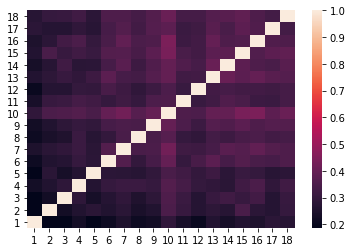

In [90]:
sns.heatmap(np.flip(rbf_vals, 1), xticklabels=range(1, 18+1), yticklabels=range(18, 0, -1));

In [121]:
print(lin_vals)

[[1.         0.98248242 0.96114412 0.95121319 0.90460212 0.71041576
  0.47315452 0.38221755 0.31722107 0.27903575 0.25892686 0.24506719]
 [0.98248242 1.         0.99294096 0.98335407 0.95183908 0.75358897
  0.50744447 0.41371993 0.34471121 0.30324662 0.28150918 0.26641857]
 [0.96114412 0.99294096 1.         0.99445655 0.96767089 0.76605118
  0.51650029 0.42217762 0.3524165  0.31063183 0.28872567 0.27348558]
 [0.95121319 0.98335407 0.99445655 1.         0.97601547 0.78270474
  0.53881083 0.44590866 0.37730722 0.33579883 0.31386207 0.29857912]
 [0.90460212 0.95183908 0.96767089 0.97601547 1.         0.86372819
  0.64402416 0.55500195 0.48563069 0.44082381 0.41642609 0.39986809]
 [0.71041576 0.75358897 0.76605118 0.78270474 0.86372819 1.
  0.91641715 0.85514805 0.80074403 0.7619774  0.73903904 0.72382307]
 [0.47315452 0.50744447 0.51650029 0.53881083 0.64402416 0.91641715
  1.         0.98668085 0.96352048 0.94102505 0.92561751 0.91487866]
 [0.38221755 0.41371993 0.42217762 0.44590866 0.5

In [114]:
print(lin_vals)

[[1.         0.98822128 0.96864577 0.94506764 0.84834738 0.58058964
  0.38203942 0.30834932 0.27336096 0.25623951 0.2498741  0.24393084]
 [0.98822128 1.         0.98886123 0.96045117 0.87905716 0.61475402
  0.41201909 0.33673577 0.30072946 0.28261005 0.27595218 0.26954692]
 [0.96864577 0.98886123 1.         0.9828193  0.90749149 0.63409695
  0.42791082 0.35237271 0.31687092 0.29899749 0.29216579 0.28537392]
 [0.94506764 0.96045117 0.9828193  1.         0.93184827 0.66351566
  0.46338771 0.3904026  0.3567184  0.33894004 0.33143854 0.32377679]
 [0.84834738 0.87905716 0.90749149 0.93184827 1.         0.83521269
  0.66546147 0.5968039  0.55941694 0.53621035 0.52402475 0.51286493]
 [0.58058964 0.61475402 0.63409695 0.66351566 0.83521269 1.
  0.94082216 0.89526446 0.86034934 0.83374846 0.81842072 0.80571088]
 [0.38203942 0.41201909 0.42791082 0.46338771 0.66546147 0.94082216
  1.         0.9877828  0.96883966 0.94919752 0.9360177  0.92503854]
 [0.30834932 0.33673577 0.35237271 0.3904026  0.5

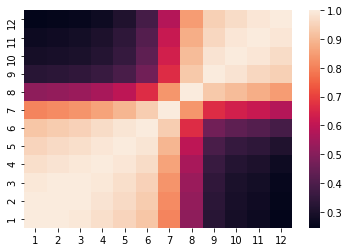

In [113]:
# Random
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

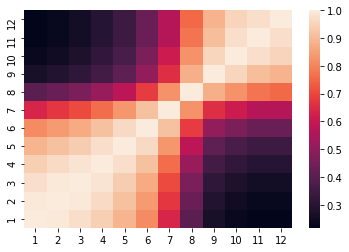

In [95]:
# Core set
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

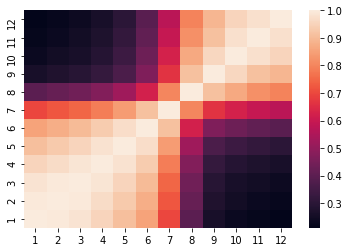

In [105]:
# Entropy
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

(200.0, 1000.0)

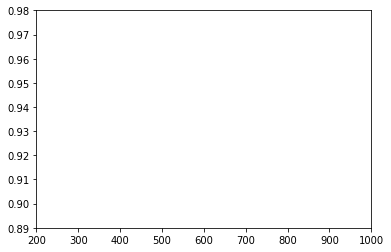

In [9]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "long-besov"],
    x="labeled",
    y="f1_micro",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=95,
    linewidth=3,
)
g.set_ylim(0.89, 0.98)
g.set_xlim(200, 1000)

In [7]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "ada-besov"],
    x="labeled",
    y="f1_micro",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=95,
    linewidth=3,
)
# g.set_ylim(0.82, 0.92)
# g.set_xlim(500, 1000)

ValueError: Could not interpret value `acuraccy` for parameter `y`

In [57]:
from transformers import AutoAdapterModel, AdapterConfig
from datasets import load_dataset

d = load_dataset("glue", "qqp")


def save_dataset(hfd, name):
    hfd["train"].to_pandas()[["question1", "question2", "label"]].sample(
        5_000
    ).reset_index(drop=True).to_csv(f"data/{name}/train.csv", header=False)
    hfd["test"].to_pandas()[["question1", "question2", "label"]].sample(
        2_000
    ).reset_index(drop=True).to_csv(f"data/{name}/test.csv", header=False)
    hfd["validation"].to_pandas()[["question1", "question2", "label"]].sample(
        1_000
    ).reset_index(drop=True).to_csv(f"data/{name}/validation.csv", header=False)


save_dataset(d, "QQP")

In [8]:
model = AutoAdapterModel.from_pretrained("bert-base-uncased")
a = model.load_adapter("adapters/TREC-2-BERT-pfeiffer")
model.add_classification_head("head", num_labels=2)
model.add_adapter("head")
model.train_adapter("head")

In [37]:
from datasets import load_dataset
d = load_dataset("glue", "cola")

Reusing dataset glue (/home/jjukic/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [44]:
d["test"][3]

{'sentence': 'the kittens yawned awake and played.', 'label': -1, 'idx': 3}